### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [2]:
def set_init():
    df = pd.read_csv('./data/ecommerce_sales_data.csv')
    df['DiscountRate'] = df['DiscountRate'].fillna(0)
    df['OrderDate'] = pd.to_datetime(df['OrderDate'])

    return df

In [3]:
# 1
df = pd.read_csv('./data/ecommerce_sales_data.csv')
print(df.head())

# 2
print(df.info()) # 결측값 없음
df['DiscountRate'] = df['DiscountRate'].fillna(0)
print(df.info()) # 결측값 해결

# 3
print(list(map(type, df.iloc[0, :]))) 
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(type(df['OrderDate'].iloc[0]))



   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_22240\3696638639.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df[['TotalRevenue']].resample('M').sum()


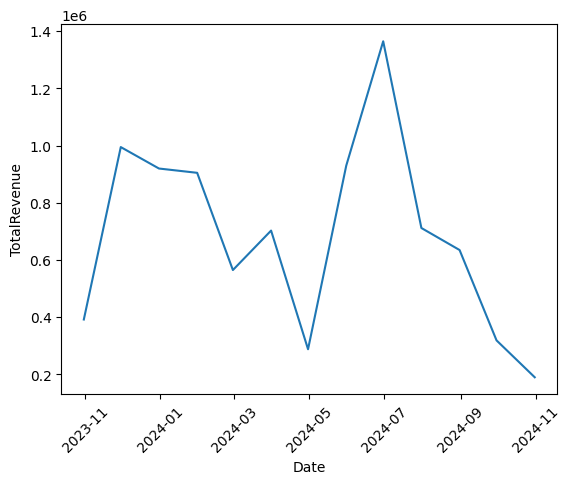

['Food', 'Electronics', 'Beauty']
['미국', '독일', '중국', '일본', '대한민국']


In [4]:

df = set_init()

# 1 
df['TotalRevenue'] = df['Quantity'] * df['Price']


# 2
df.set_index('OrderDate', inplace=True)

# 월별 리샘플링을 하여 'TotalRevenue'의 합을 계산 ??
df_resampled = df[['TotalRevenue']].resample('M').sum()

# 
plt.plot(df_resampled.index, df_resampled['TotalRevenue'])

plt.xlabel('Date')
plt.ylabel('TotalRevenue')
plt.xticks(rotation=45)
plt.show()

# 3
print(list(df[['Category', 'TotalRevenue']].groupby('Category').sum().sort_values('TotalRevenue', ascending=False).head(3).index))

# 4
print(list(df[['Country', 'TotalRevenue']].groupby('Country').sum().sort_values('TotalRevenue', ascending=False).head().index))



3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [5]:
# 1
print(list(df[['CustomerID', 'TotalRevenue']].groupby('CustomerID').sum('TotalRevenue').sort_values('TotalRevenue', ascending=False).head().index))

# 2
print(list(df[['CustomerID', 'OrderID']].groupby('CustomerID').count().sort_values('OrderID', ascending=False).head().index))

# 3 # 생일 데이터 사용 -> 몇십년대 생인지 분류 각 값의 3번째 문자열
df['Generation'] = df['Birthdate'].str[2]

print(df['Generation'])

# 그룹별 빈도 계산 (size()로 빈도 구하기)
group_counts = df.groupby(['Generation', 'Category']).size().reset_index(name='Counts')
group_counts

# Pivot Table로 재구성
pivot = group_counts.pivot_table(
    index='Generation',
    columns='Category',
    values='Counts',
    fill_value=0,  # NaN 대신 0으로 채우기
    aggfunc='sum'
)

print(pivot)

print(f'{pivot.idxmax(axis=1)}')

###
# .size(): 그룹화된 데이터에서 각 그룹의 데이터 개수를 계산.
# .reset_index(name='Counts'): 그룹화 결과를 DataFrame으로 변환하고, 새 열에 이름(Counts)을 지정.
# values='Counts': 피벗 테이블에 표시할 열을 지정. 지정한 열의 데이터가 테이블 값으로 들어감.
# ###

[1007, 1354, 1141, 1589, 1632]
[1007, 1038, 1141, 1278, 1421]
OrderDate
2024-06-10 17:18:00    8
2023-11-18 18:45:00    6
2023-10-15 11:19:00    7
2024-07-19 02:19:00    7
2024-01-20 20:34:00    9
                      ..
2024-03-01 16:57:00    7
2024-01-18 21:37:00    7
2024-09-29 12:27:00    6
2024-06-10 09:01:00    8
2024-06-29 10:28:00    8
Name: Generation, Length: 120, dtype: object
Category    Beauty  Books  Clothing  Electronics  Food  Sports
Generation                                                    
0                3      1         2            1     2       3
6                4      2         2            3     2       1
7                4      9         5            7     2       5
8                7      7         4            3     5       5
9                5      3         2            5    12       4
Generation
0    Beauty
6    Beauty
7     Books
8    Beauty
9      Food
dtype: object


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [6]:
# 1 - **Product**: 주문한 상품 이름
print(list(df.groupby(['Product']).size().sort_values(ascending=False).head().index))

# 2
df_category_produt = df.groupby(['Category', 'Product']).size().reset_index(name='Counts')

pivot = df_category_produt.pivot_table(
    index='Category',
    columns="Product",
    values="Counts",
    fill_value=0,
    aggfunc='sum'
)

print(pivot)

print(pivot.idxmax(axis=1))

# 3 - **Quantity**: 주문 수량
print(list(df[['Product', 'Quantity']].groupby(['Product']).mean('Quantity').sort_values('Quantity', ascending=False).head(3).index))



['립스틱', '셔츠', '소설', '역사책', '과자']
Product      과자  과학책  노트북  라면  로션  립스틱  비즈니스  샴푸  셔츠  소설  ...  자켓  주스  청바지  \
Category                                                  ...                
Beauty        0    0    0   0   2    7     0   3   0   0  ...   0   0    0   
Books         0    5    0   0   0    0     2   0   0   7  ...   0   0    0   
Clothing      0    0    0   0   0    0     0   0   7   0  ...   2   0    3   
Electronics   0    0    5   0   0    0     0   0   0   0  ...   0   0    0   
Food          6    0    0   5   0    0     0   0   0   0  ...   0   1    0   
Sports        0    0    0   0   0    0     0   0   0   0  ...   0   0    0   

Product      초콜릿  축구공  커피  태블릿  향수  헤드폰  화장품  
Category                                      
Beauty         0    0   0    0   5    0    6  
Books          0    0   0    0   0    0    0  
Clothing       0    0   0    0   0    0    0  
Electronics    0    0   0    3   0    4    0  
Food           6    0   5    0   0    0    0  
Sports       

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

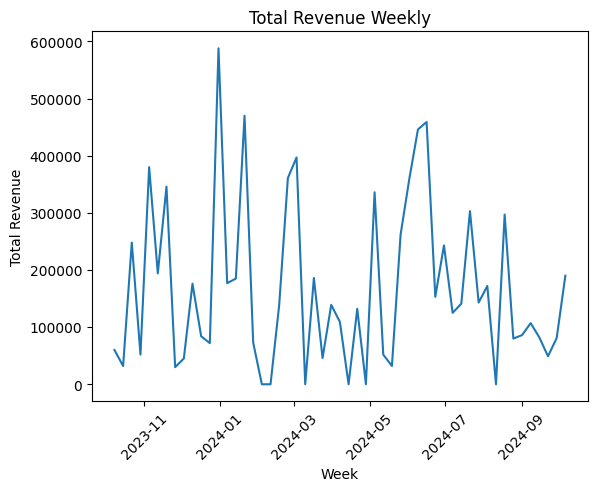

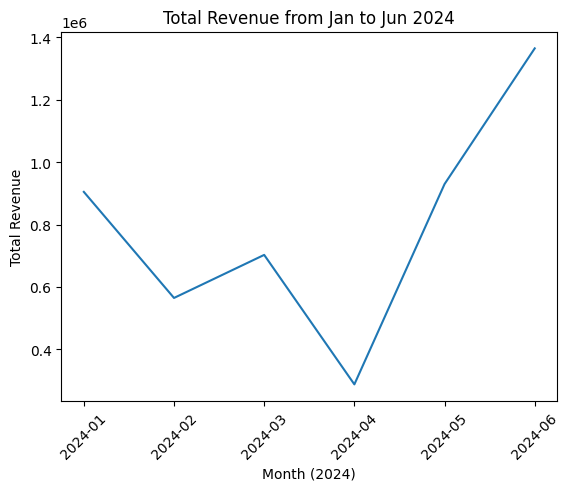

In [7]:
# # 1
# #df_resampled = df[['TotalRevenue']].resample('M').sum() #  - **OrderDate**: 주문 날짜

# df = set_init()

# # 총 매출 계산
# df['TotalRevenue'] = df['Quantity'] * df['Price']

# # OrderDate를 인덱스로 설정
# df.set_index('OrderDate', inplace=True)

# # 주간 단위로 리샘플링 (TotalRevenue를 주 단위로 합산)
# df_resampled = df[['TotalRevenue']].resample('W').sum()

# # 매출 시각화
# plt.plot(df_resampled.index, df_resampled['TotalRevenue'])

# # 그래프 꾸미기
# plt.xlabel('Week') 
# plt.ylabel('TotalRevenue')
# plt.xticks(rotation=45)
# plt.show()

# # 2
# # 연도 데이터 추출
# df['Date'] = df.index.to_series().dt.year.astype(str) +  df.index.to_series().dt.month.astype(str)

# # print(df['Date'].str[4:])

# # 2024년 1월부터 6월까지 필터링
# df_Date = df[(df['Date'].str[:4] == '2024') & (df['Date'].str[4:].astype(int) >= 1) & (df['Date'].str[4:].astype(int) <= 6)]

# # 'Date'별로 TotalRevenue 집계
# df_Date_grouped = df_Date.groupby(['Date'])['TotalRevenue'].sum()

# print(df_Date_grouped)

# plt.plot(df_Date_grouped.index, df_Date_grouped.values)

# # x축 레이블을 월로 수정
# plt.xlabel('Month (2024)')
# plt.ylabel('Total Revenue')

# # x축의 날짜에서 월만 추출하여 레이블 설정
# plt.xticks(ticks=df_Date_grouped.index, labels=df_Date_grouped.index.month)

# # 그래프 제목 설정
# plt.title('Total Revenue from Jan to Jun 2024')

# # 그래프 표시
# plt.xticks(rotation=45)
# plt.show()

# 3

# 예시 데이터 (실제 df는 이미 존재할 것이라 가정)
df = set_init()  # 데이터프레임을 초기화하는 함수, 실제 코드에서 이 부분은 다르게 구성될 수 있습니다.

# 총 매출 계산
df['TotalRevenue'] = df['Quantity'] * df['Price']

# OrderDate를 인덱스로 설정
df.set_index('OrderDate', inplace=True)

# 주간 단위로 리샘플링 (TotalRevenue를 주 단위로 합산)
df_resampled = df[['TotalRevenue']].resample('W').sum()

# 매출 시각화
plt.plot(df_resampled.index, df_resampled['TotalRevenue'])

# 그래프 꾸미기
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.title('Total Revenue Weekly')
plt.show()

# 2. 연도 및 월 정보 추출
df['Date'] = df.index.to_series().dt.strftime('%Y-%m')  # 'YYYY-MM' 형식으로 연도-월 정보 생성

# 2024년 1월부터 6월까지 필터링
df_Date = df[(df['Date'].str[:4] == '2024') & (df['Date'].str[5:].astype(int) >= 1) & (df['Date'].str[5:].astype(int) <= 6)]

# 'Date'별로 TotalRevenue 집계
df_Date_grouped = df_Date.groupby(['Date'])['TotalRevenue'].sum()

# 매출 시각화
plt.plot(df_Date_grouped.index, df_Date_grouped.values)

# x축 레이블을 월로 수정
plt.xlabel('Month (2024)')
plt.ylabel('Total Revenue')

# x축 레이블을 'YYYY-MM' 형식으로 유지
plt.xticks(ticks=df_Date_grouped.index, labels=df_Date_grouped.index)

# 그래프 제목 설정
plt.title('Total Revenue from Jan to Jun 2024')

# 그래프 표시
plt.xticks(rotation=45)
plt.show()




6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.